In [ ]:
!pip3 install opencv-contrib-python
!pip3 install matplotlib
!pip3 install numpy
!pip3 install rembg

In [ ]:
!pip3 install torch==1.7.1+cpu torchvision==0.8.2+cpu torchaudio===0.7.2 -f https://download.pytorch.org/whl/torch_stable.html
!pip3 install easyocr

In [ ]:
# background


# import PIL module
from PIL import Image
  
# Front Image
filename = 'Train_5/Training/BK/N17.svg.png'
# Back Image
filename1 = 'Train_5/Training/BK/BG.jpg'
  
# Open Front Image
frontImage = Image.open(filename)

  
# Open Background Image
background = Image.open(filename1)
  
# Convert image to RGBA
frontImage = frontImage.convert("RGBA")
  
# Convert image to RGBA
background = background.convert("RGBA")
  
# Calculate width to be at the center
width = (background.width - frontImage.width) // 2
  
# Calculate height to be at the center
height = (background.height - frontImage.height) // 2
  
# Paste the frontImage at (width, height)
background.paste(frontImage, (width, height), frontImage)
  
# Save this image
background.save("Train_5/Training/BK/N17.png", format="png")









In [ ]:
print(frontImage.size)
print(background.size)

In [ ]:
# Background colour


RED =0
GREEN =0
BLUE =255
ALPHA = 200
Image = cv2.imread("Train/Train_Neg_13.svg.png", cv2.IMREAD_UNCHANGED)

trasn_mask = Image[:,:,3 ]==0

Image[trasn_mask]=[BLUE, GREEN, RED, ALPHA]
cv2.imwrite("Train/output.png", Image)
#print(Image.shape)
#resized = cv.resize(Image, None, fx=0.5, fy=0.5)
#cv.imshow('windows', resized)
#cv.waitKey(0)

In [ ]:
image_webp = 'Train/Train_Neg_11.svg'
image_png = 'Train/Train_Neg_11.png'

im = Image.open(image_webp)
im.save(image_png, format="png", lossless=True)


In [ ]:
!pip3 install pixellib
import pixellib
from pixellib.tune_bg import alter_bg

change_bg = alter_bg()
change_bg.load_pascalvoc_model("deeplabv3_xception_tf_dim_ordering_tf_kernels.h5")
change_bg.change_bg_img(f_image_path = "Train_5/Stop_sign.png",b_image_path = "Train_5/BK1.jpg", output_image_name="Train_5/new_img.jpg")


In [ ]:
import random
from skimage import transform

def rotate_20_rand(X):
    result = 255*transform.rotate(X, angle=np.random.uniform(-20, 20), mode='edge')
    result = result.astype(np.uint8)
    return result

test_image = cv2.imread('Train_5/Stop_sign.png')
#plt.imshow(test_image)
image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)



image = rotate_20_rand(image)
#fig, axaxarray = plt.subplots(1,1)
#axaxarray.imshow(rotate_20_rand(test_image), interpolation='nearest')
#axaxarray.set_title("Rotation")
plt.imshow(image)
plt.savefig('Train_5/image2.png')

In [1]:
import cv2
import numpy as np
import easyocr
import matplotlib.pyplot as plt
from rembg import remove
import os
from PIL import Image
import glob
import pytesseract
from pytesseract import Output
from scipy.interpolate import splprep, splev
from spellchecker import SpellChecker
spell = SpellChecker()
import re
from textblob import Word



In [2]:
#min_area = image.size*(1/200)
min_area = 2000
alpha = .006
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
colors_list = ['red', 'blue', 'green', 'black', 'white', 'yellow']
def get_max_area(image):
    return image.size/3.2


In [3]:
#pytesseract.pytesseract.tesseract_cmd = 'C:\Program Files (x86)\Tesseract-OCR\tesseract.exe'

pytesseract.pytesseract.tesseract_cmd = '/opt/homebrew/bin/tesseract'


In [4]:
#!pip3 install textblob
word = Word('stopl')
result = word.correct()

print(result)

stop


In [36]:
def sign_name(path):
    file_name = os.path.basename(path)
    Name = os.path.splitext(file_name)[0]
    return Name.lower()


def write_name(path, Extract_path):
    Name = sign_name(path)
    with open(Extract_path, "a+") as file:
        file.write("\n \n % traffic_sign({}, stop).".format(Name))
    file.close()


    
def has_color(items, path, Extract_path):
    with open(Extract_path, "a+") as file:
        for item in items:
            # write each item on a new line
            file.write("\n has_color({},{}).".format(sign_name(path), item))
    #print('Done')
    file.close()
    
def has_shape(items, path, Extract_path):
    with open(Extract_path, "a+") as file:
        for item in items:
            # write each item on a new line
            file.write("\n has_shape({},{}).".format(sign_name(path),item))
    #print('Done')
    file.close()
    
 
    
def has_external_shape(shape, path, Extract_path):    
    with open(Extract_path, "a+") as file: 
        # write each item on a new line
        file.write("\n has_external_shape({},{}).".format(sign_name(path),shape))
    #print('Done')
    file.close()  

    
# A text file is created and flushed
def has_word_(item, path, Extract_path):
    with open(Extract_path, "a+") as file:
        for idx, item in enumerate(item):
            i = idx+1
            if item.isdigit():
                file.write("\n has_number({},{}_{}).".format(sign_name(path), sign_name(path), i))
                file.write("\n has_digits({}_{},{}).".format(sign_name(path), i, list(item)))
            else:
                file.write("\n has_word({},{}_{}).".format(sign_name(path), sign_name(path), i))
                n , com =commonCharacterCount('STOP', item)
                #print(item)
                #print(n)
                if n>2:
                    #file.write("\n nearly_match_letters({}_{}, {}).".format(sign_name(path), i,  list('stop')))
                    file.write("\n nearly_match_letters({}_{}, {}).".format(sign_name(path), i, 'stop'))

                # write each item on a new line
                file.write("\n has_letters({}_{},{}).".format(sign_name(path), i,list(item.lower())))

                if item.isupper():
                    file.write("\n font_case({}_{}, uppercase).".format(sign_name(path), i))
                elif item.islower():
                    file.write("\n font_case({}_{}, lowercase).".format(sign_name(path), i))
                else:
                    file.write("\n font_case({}_{}, mixed).".format(sign_name(path), i))

    #print('Done')
    file.close()
    
    
def commonCharacterCount(s1, s2):
    a=list(set(s1)&set(s2))
    return(len(a), a)        


def nearly_match(item):
    List = [ 'down', 'stop', 'work', 'enter', 'not', 'give', 'way']
    #print('item=', item)
    m = len(item)
    OUT = []
    if m!= 0:
        item = item.lower()
        print('item=', item)
        print('item=', item)
        for word in List:
            s = len(word)
            n , com =commonCharacterCount(word, item )
            print(n/max(m,s))
            if n/max(m,s)>0.5:
                OUT.append(word)

    print("finalout=", OUT)
    return OUT


# A text file is created and flushed
def has_word(item, path, Extract_path):
    items = list(dict.fromkeys(item))
    print('items=', items)
    with open(Extract_path, "a+") as file:
        for idx, item in enumerate(items):
            i = idx+1
            if item.isdigit():
                file.write("\n has_number({},{}_{}).".format(sign_name(path), sign_name(path), i))
                file.write("\n has_digits({}_{},{}).".format(sign_name(path), i, item))
            else:
                
                #corrected = spell.correction(item)
                print('item=', item)
                word = Word(item)
                corrected = word.correct()
                print('corrected=', corrected)

                word = nearly_match(item)

                print('word=', word)
                word = ''.join(word)
                print('word=', word)
                #if word == 'NONE':
                #    file.write("\n Other_letters({}_{}, {}).".format(sign_name(path), i, word))
                #else:
                if len(word) > 1:
                    file.write("\n has_word({},{}_{}).".format(sign_name(path), sign_name(path), i))
                    file.write("\n nearly_match_letters({}_{}, {}).".format(sign_name(path), i, word))
                    #if item.isupper():
                    #    file.write("\n font_case({}_{}, uppercase).".format(sign_name(path), i))
                    #elif item.islower():
                    #    file.write("\n font_case({}_{}, lowercase).".format(sign_name(path), i))
                    #else:
                    #    file.write("\n font_case({}_{}, mixed).".format(sign_name(path), i))

    #print('Done')
    file.close()
    
    
def recognize_text_(image):
    '''loads an image and recognizes text.'''
    reader = easyocr.Reader(['en'])
    #image= remove_noise_T(image)

    result = reader.readtext(image, detail=1, paragraph=False)
    texts = []
    for (bbox, text, prob) in result:
        if prob >= 0.2:
            # display 
            #print(f'Detected text: {text} (Probability: {prob:.2f})')
            texts.append(text)
    return texts
            
        
    
def recognize_text__(image):
    '''loads an image and recognizes text.'''
    reader = easyocr.Reader(['en'])
    #image= remove_noise_T(image)

    result = reader.readtext(image, detail=1, paragraph=False)
    result1= reader.readtext(getcolormask('red', image), detail=1, paragraph=False)
    result2= reader.readtext(getcolormask('white', image), detail=1, paragraph=False)

    #result3= reader.readtext(getcolormask('black', image), detail=1, paragraph=False)
    print('result=',result)
    print('result1=',result1)
    print('result2=',result2)
    

    texts = []
    for (bbox, text, prob) in result:
        getVals = list([val for val in text if val.isalpha() or val.isnumeric()])
        text = "".join(getVals)
        if prob >= 0.1 and text is not None:
            # display 
            #print(f'Detected text: {text} (Probability: {prob:.2f})')
            texts.append(text)
    for (bbox, text, prob) in result1:
        getVals = list([val for val in text if val.isalpha() or val.isnumeric()])
        text = "".join(getVals)
        if prob >= 0.1 and text is not None:
            # display 
            #print(f'Detected text: {text} (Probability: {prob:.2f})')
            texts.append(text)

    for (bbox, text, prob) in result2:
        getVals = list([val for val in text if val.isalpha() or val.isnumeric()])
        text = "".join(getVals)
        if prob >= 0.1 and text is not None:
            # display 
            #print(f'Detected text: {text} (Probability: {prob:.2f})')
            texts.append(text)

    texts = list( dict.fromkeys(texts)) 
    return texts


def recognize_text__(image):
    '''loads an image and recognizes text.'''
    img = image.copy()
    img= remove_noise_T(img)
    custom_config = r'--oem 3 --psm 13'
    text = pytesseract.image_to_string(img, config=custom_config)
    print(text)
    return text

def recognize_text(image):
    '''loads an image and recognizes text.'''
    reader = easyocr.Reader(['en'])
    #image= remove_noise_T(image)

    result = reader.readtext(image, detail=1, paragraph=False)
    texts = []
    for (bbox, text, prob) in result:
        getVals = list([val for val in text if val.isalpha() or val.isnumeric()])
        text = "".join(getVals)
        if prob >= 0.1 and text is not None:
            # display 
            #print(f'Detected text: {text} (Probability: {prob:.2f})')
            texts.append(text)
    texts = list( dict.fromkeys(texts)) 
    return texts

def recognize_text_1(image):
    '''loads an image and recognizes text.'''
    img = image.copy()
    img = get_contours(img)
    smoothened = get_smoothened(contours)
    stencil  = np.zeros(image.shape[:-1]).astype(np.uint8)
    stencil[:] = 160

        # Overlay the smoothed contours on the original image
    cv2.drawContours(stencil, smoothened, -1, (255,0,255), thickness=cv2.FILLED)

    text = pytesseract.image_to_string(stencil, config='--psm 13')
    print(text)
    return text

In [37]:

#get colour mask
def getcolormask(color, image):  
    if color == 'red':
        #lower_bound = np.array([160,50,50])
        #upper_bound = np.array([180,255,255])
        lower_bound_red = np.array([130,20,70])
        upper_bound_red = np.array([180,255,255])
        lower_bound_orange = np.array([0, 70, 25])
        upper_bound_orange = np.array([25, 255, 255])
        mask_red = cv2.inRange(get_hsv(image), lower_bound_red, upper_bound_red)
        mask_orange = cv2.inRange(get_hsv(image), lower_bound_orange, upper_bound_orange)
        mask = mask_orange + mask_red
        


    elif color == 'green':
        lower_bound = np.array([50, 20, 20])   
        upper_bound = np.array([100, 255, 255])
        mask = cv2.inRange(get_hsv(image), lower_bound, upper_bound)

    elif color == 'blue':
        #lower_bound = np.array([108,50,38])
        #upper_bound = np.array([120,255,255])
        lower_bound = np.array([100,150,0])
        upper_bound = np.array([140,255,255])
        mask = cv2.inRange(get_hsv(image), lower_bound, upper_bound)

        


    elif color == 'black':
        lower_bound = np.array([0, 0, 0])
        upper_bound = np.array([[180, 255, 40]]) 
        mask = cv2.inRange(get_hsv(image), lower_bound, upper_bound)

    elif color == 'white':
        lower_bound = np.array([0,0,168])
        upper_bound = np.array([172,111,255])
        #lower_bound = np.array([0, 0, 10])
        #upper_bound = np.array([255, 120, 255])
        mask = cv2.inRange(get_hsv(image), lower_bound, upper_bound)

    elif color == 'yellow':
        lower_bound = np.array([20, 80, 80])
        upper_bound = np.array([30, 255, 255])
        mask = cv2.inRange(get_hsv(image), lower_bound, upper_bound)

    mask = post_process(mask)
    return mask


 
    
def get_color(image):    
    max_area = get_max_area(image)

    colors_present =[]
    contour_list = []
    for color in colors_list:
        mask = getcolormask(color , image)

        if cv2.countNonZero(mask) > min_area:

            contours, hierarchy = cv2.findContours(mask, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
            if len(contours)>2:
                #print(color)
                colors_present.append(color)
            else:
                cnt_max = max(contours, key = cv2.contourArea)
                area = cv2.contourArea(cnt_max) 
                #print("{},{}".format(color, area))
                if (area > min_area) and (area < max_area ) :
                    colors_present.append(color)
    colors_present = list(dict.fromkeys(colors_present))
    return colors_present




# find contours via color mask
def get_contours(image):
    contour_list = []
    for color in colors_list:
        mask = getcolormask(color , image)
        if cv2.countNonZero(mask) > min_area:
            contours, hierarchy = cv2.findContours(mask, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
            for cnt in contours: 
                if cv2.contourArea(cnt, True)>0:    #Consider only clockwise contours
                    contour_list.append(cnt)
#    cnt_max = max(contour_list, key = cv2.contourArea)
#    contour_list.remove(cnt_max)
#    cv2.drawContours(image, contour_list,  -1, (0,255,0), 8)
#    print(len(contour_list))
    return contour_list




# find biggest contours
def get_external_contour(image):    
    max_area = get_max_area(image)

    contours = get_contours(image)
    cnt = max(contours, key = cv2.contourArea)
    area = cv2.contourArea(cnt)
    if (area > min_area) and (area < max_area ):
        cnt_max=cnt
    else:
        contours.remove(cnt)
        cnt_max = max(contours, key = cv2.contourArea)
    
    #cv2.drawContours(image, cnt_max,  -1, (255,0,0), 5)
    return cnt_max




def get_external_shape(image):
 #   remove_bg(image)
    cnt = get_external_contour(image) 
    #cv2.drawContours(image, cnt,  -1, (0,255,0), 2)
    approx = cv2.approxPolyDP(cnt, alpha*cv2.arcLength(cnt, True), True)
    #print(len(approx))
    (x, y, w, h) = cv2.boundingRect(approx)
    ar = w / float(h)
    #print(len(approx))
    if len(approx) == 3 : #and cv2.isContourConvex(cnt)
        shape = "triangle"
    elif len(approx) == 4 :
        shape = "rectangle"
    elif len(approx) == 5 :
        shape = "pentagon"
    elif len(approx) == 6 :
        shape = "hexagon"
    elif len(approx) == 8:
        if ar >= 0.95 and ar <= 1.05 :
            shape = "octagon"
        else:
            shape = "other"
    elif 14 < len(approx) < 20 and ar >= 0.95 and ar <= 1.05 :
        shape = "circle"
    else:
        shape = "other"
    return shape
    
    


def get_shape(image):
    max_area = get_max_area(image)
    
    shape_list = [] 
    contours = get_contours(image)
    cv2.drawContours(image, contours,  -1, (0,255,255), 12)
    
#    print(len(contours))

    #print(len(contours))
#    cnt_max = max(contours, key = cv2.contourArea)
#    contours.remove(cnt_max)

#    print(len(contours))

#    cv2.drawContours(image, contours,  -1, (0,255,0), 3)

    for cnt in contours:

        area = cv2.contourArea(cnt)
        if (area > min_area) and (area < max_area ) :
            approx = cv2.approxPolyDP(cnt, alpha*cv2.arcLength(cnt, True), True)
            (x, y, w, h) = cv2.boundingRect(approx)

            ar = w / float(h)
            #print(len(approx))
            if len(approx) == 3 :
                shape = "triangle"
            elif len(approx) == 4 :
                 shape = "rectangle"
            elif len(approx) == 5 :
                shape = "pentagon"
            elif len(approx) == 6 :
                shape = "hexagon"
            elif len(approx) == 8:
                if ar >= 0.95 and ar <= 1.05 :
                    shape = "octagon"
                else:
                    #print('T')
                    shape = "other"
            elif 14 < len(approx) < 20:
                if ar >= 0.95 and ar <= 1.05 :
                    shape = "circle" 
                    cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
                else:
                    shape = "other" 
                    #print(ar)
#                    cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
            else:
                shape = "other"
                #print(len(approx))
#                cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,255),4)
                #cv2.drawContours(image, approx,  -1, (0,255,0), 13)
            shape_list.append(shape)
#ß    my_dict = {i:shape_list.count(i) for i in shape_list}
    shape_list = list(dict.fromkeys(shape_list))        
    return shape_list



    
def remove_bg_(image):
#    image = remove_noise(image)
    image = remove(image) 
    image = cv2.cvtColor(np.array(image), cv2.COLOR_BGRA2BGR)

    image = image.copy()

    if len(image.shape) > 2 and image.shape[2] == 4:
        image = image[:, :, :3]
    contour = [get_external_contour(image)]
    fill_color = [205,192,176] # any BGR color value to fill with
    mask_value = 255            # 1 channel white (can be any non-zero uint8 value)
    stencil  = np.zeros(image.shape[:-1]).astype(np.uint8)
    cv2.fillPoly(stencil, contour, mask_value)
    sel      = stencil != mask_value # select everything that is not mask_value
    image[sel] = fill_color            # and fill it with fill_color

    return image

def remove_bg(image):
    image = remove(image) 
    image = cv2.cvtColor(np.array(image), cv2.COLOR_BGRA2BGR)

    return cv2.medianBlur(image,5)

#cv2.drawContours(img, contours,  -1, (255,0,0), 5)

# objects = car, bike, arrow, man, animal, exclamation, bump, snowflake



  
def white_bg(image):
    tmp = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)   ## Convert image to image gray
    _, alpha = cv2.threshold(tmp, 0, 255, cv2.THRESH_BINARY)  # Applying thresholding technique
    b, g, r = cv2.split(image) # Using cv2.split() to split channels of coloured image
    rgba = [b, g, r, alpha] # Making list of Red, Green, Blue Channels and alpha
    dst = cv2.merge(rgba, 4) # Using cv2.merge() to merge rgba into a coloured/multi-channeled image
    plt.imshow(dst)
    #cv2.imwrite("gfg_white.png", dst) # Writing and saving to a new image
    return dst




def get_matchshape(image):
    objects_list = []
    contours = get_contours(image)
    for cnt in contours:
        for shape in objects:
            if cv2.matchShapes(cnt,shape,1,0.0)>0.05:
                objects_list.append(shape)
    return(objects_list)


In [38]:

def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


# noise removal canny edge
def remove_noise(image):
    image = cv2.cvtColor(np.array(image), cv2.COLOR_BGRA2BGR)
    bilateral_filtered_img = cv2.bilateralFilter(image, 5, 175, 175)
    return cv2.Canny(bilateral_filtered_img, 70, 200)

def remove_noise_(image):
    image = cv2.cvtColor(np.array(image), cv2.COLOR_BGRA2BGR)
    bilateral_filtered_img = cv2.bilateralFilter(image, 5, 175, 175)
    edges = cv2.Canny(bilateral_filtered_img, 70, 200)
#    lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
    lines = cv2.HoughLinesP(edges,rho = 1,theta = 1*np.pi/180,threshold = 100,minLineLength = 100,maxLineGap = 5)
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 3)
    return(image)

def remove_noise_T(image):
    image = cv2.cvtColor(np.array(image), cv2.COLOR_BGRA2BGR)
    bilateral_filtered_img = cv2.bilateralFilter(image, 5, 175, 175)
    blur = cv2.medianBlur(bilateral_filtered_img, 5) 
    return thresholding(blur)


def remove_noise_Text(image):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray, img_bin = cv2.threshold(gray,128,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    gray = cv2.bitwise_not(img_bin)
    img = cv2.erode(gray, kernel, iterations=1)
    img = cv2.dilate(img, kernel, iterations=1)
    return(img)





# convert to hsv
def get_hsv(image):
    blur = cv2.medianBlur(image, 5)  #applying median filter to remove noice
    #blur = cv2.GaussianBlur(image, (5,5), 0)
    return cv2.cvtColor(blur,cv2.COLOR_BGR2HSV)


# noise removal
def remove_noise2(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    gray= cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    return cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
#    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
#    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
#    kernel = np.ones((5,5),np.uint8)
    opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
    return remove_noise(opening)

def gradient(image):
#    kernel = np.ones((5,5),np.uint8)
    gradient = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel)
    return remove_noise(gradient)

def approximate_contours(contours):
    result = []
    for x in contours:
        epsilon = 0.005 * cv2.arcLength(x, True)
        approx = cv2.approxPolyDP(x, epsilon, True)
        result.append(approx)
    return result

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

def post_process(mask):
    """
    Post Process the mask for a smooth boundary by applying Morphological Operations
    Research based on paper: https://www.sciencedirect.com/science/article/pii/S2352914821000757
    args:
        mask: Binary Numpy Mask
    """
    #closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    mask = cv2.GaussianBlur(mask, (5, 5), sigmaX=2, sigmaY=2, borderType=cv2.BORDER_DEFAULT)
#    mask = np.where(mask < 127, 0, 255).astype(np.uint8)  # convert again to binary
    #bilateral_filtered_img = cv2.bilateralFilter(mask, 9, 175, 175)

    return mask



def get_circle(image):
    circles = cv2.HoughCircles(remove_noise(image), cv2.HOUGH_GRADIENT, 1.2, image.size/3000)
    if circles is not None:
        circles = np.uint16(np.around(circles))
    return circles 

def get_line(image):
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray,50,120)
    minLineLength = 20
    maxLineGap = 5
    lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
    for x1,y1,x2,y2 in lines[0]:
        cv2.line(image,(x1,y1),(x2,y2),(0,255,0),2)
    return(image)

In [42]:

def Extract_features(path):
    
    write_name(path, Extract_path)
    img = cv2.imread(path)    
    img = remove_bg(img)
    image = cv2.cvtColor(np.array(img), cv2.COLOR_BGRA2BGR)
    image = cv2.bilateralFilter(image, 5, 175, 175)
    colors_present = get_color(image)
    has_color(colors_present, path, Extract_path)        

    result1 = recognize_text(remove_noise_T(img))
    result1 = [name.lower() for name in result1]

    result2 = recognize_text(img)
    result2 = [name.lower() for name in result2]

    result  = list(dict.fromkeys(result1 + result2))
    print('result1=', result1)

    print('result2=', result2)
    print('result=', result)
    has_word(result, path, Extract_path)

    shape = get_shape(image)
    has_shape(shape, path, Extract_path)

    #external_shape = get_external_shape(img)
    #has_external_shape(external_shape, path)



In [43]:
def get_smoothened(contours):
    smoothened = []
    for contour in contours:
        x,y = contour.T
        # Convert from numpy arrays to normal arrays
        x = x.tolist()[0]
        y = y.tolist()[0]
        # https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.interpolate.splprep.html
        tck, u = splprep([x,y], u=None, s=1.0, per=1)
        # https://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linspace.html
        u_new = np.linspace(u.min(), u.max(), 40)
        # https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.interpolate.splev.html
        x_new, y_new = splev(u_new, tck, der=0)
        # Convert it back to numpy format for opencv to be able to display it
        res_array = [[[int(i[0]), int(i[1])]] for i in zip(x_new,y_new)]
        smoothened.append(np.asarray(res_array, dtype=np.int32))
    return smoothened

In [44]:
def get_similarity(contour):
    object_list = []
    for object in objects:
        match = cv2.matchShapes(template_contour, c, 3, 0.0)
        similarity = cv2.matchShapes(poly.reshape((poly.shape[0], 1, poly.shape[1])), contour, cv2.cv.CV_CONTOURS_MATCH_I2, 0)
        if match < 0.15:
            closest_contour = c
        else:
            closest_contour = [] 
        if similarity>.5:
            object_list.append(object)
    return object_list

In [48]:
#source_path = "Train_5/Training"

source_path = "Train_5/Training/*"
Extract_path = "Train_5/Training/Training_BK.txt"

#source_path = "Train_5/Test/subtle/*"
#Extract_path = "Train_5/Test/subtle/bk_subtle.txt"

#source_path = "Train_5/Test/LoveHate/*"
#Extract_path = "Train_5/Test/LoveHate/bk_Love.txt"

#source_path = "Train_5/Test/LoveHate/Angle/*"
#Extract_path = "Train_5/Test/LoveHate/bk_Love_Angle.txt"

#source_path = "Train_5/Test/BW Rectangles - GTSRB/*"
#Extract_path = "Train_5/Test/BW Rectangles - GTSRB/bk_GTSRB.txt"



for filename in sorted(glob.iglob(source_path, recursive=True)):
    if (filename.endswith(".png")) or (filename.endswith(".jpeg")) or (filename.endswith(".jpg")):
        Extract_features(filename)
        print(filename)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


result1= ['stop']
result2= ['stop']
result= ['stop']
items= ['stop']
item= stop
corrected= stop
item= stop
item= stop
0.25
1.0
0.25
0.2
0.5
0.0
0.0
finalout= ['stop']
word= ['stop']
word= stop
Train_5/Test/subtle/octnoise_10ft_0deg.jpg


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


result1= []
result2= ['stop']
result= ['stop']
items= ['stop']
item= stop
corrected= stop
item= stop
item= stop
0.25
1.0
0.25
0.2
0.5
0.0
0.0
finalout= ['stop']
word= ['stop']
word= stop
Train_5/Test/subtle/octnoise_10ft_15deg.jpg


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


result1= []
result2= ['stop']
result= ['stop']
items= ['stop']
item= stop
corrected= stop
item= stop
item= stop
0.25
1.0
0.25
0.2
0.5
0.0
0.0
finalout= ['stop']
word= ['stop']
word= stop
Train_5/Test/subtle/octnoise_10ft_30deg.jpg


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


result1= ['stop']
result2= ['stop']
result= ['stop']
items= ['stop']
item= stop
corrected= stop
item= stop
item= stop
0.25
1.0
0.25
0.2
0.5
0.0
0.0
finalout= ['stop']
word= ['stop']
word= stop
Train_5/Test/subtle/octnoise_15ft_0deg.jpg


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


result1= []
result2= ['stopi']
result= ['stopi']
items= ['stopi']
item= stopi
corrected= stop
item= stopi
item= stopi
0.2
0.8
0.2
0.2
0.4
0.2
0.0
finalout= ['stop']
word= ['stop']
word= stop
Train_5/Test/subtle/octnoise_15ft_15deg.jpg


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


result1= ['stqp']
result2= ['stop']
result= ['stqp', 'stop']
items= ['stqp', 'stop']
item= stqp
corrected= step
item= stqp
item= stqp
0.0
0.75
0.0
0.2
0.25
0.0
0.0
finalout= ['stop']
word= ['stop']
word= stop
item= stop
corrected= stop
item= stop
item= stop
0.25
1.0
0.25
0.2
0.5
0.0
0.0
finalout= ['stop']
word= ['stop']
word= stop
Train_5/Test/subtle/octnoise_20ft_0deg.jpg


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


result1= ['op']
result2= ['stop']
result= ['op', 'stop']
items= ['op', 'stop']
item= op
corrected= op
item= op
item= op
0.25
0.5
0.25
0.0
0.3333333333333333
0.0
0.0
finalout= []
word= []
word= 
item= stop
corrected= stop
item= stop
item= stop
0.25
1.0
0.25
0.2
0.5
0.0
0.0
finalout= ['stop']
word= ['stop']
word= stop
Train_5/Test/subtle/octnoise_20ft_15deg.jpg


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


result1= ['stqpi']
result2= ['stop']
result= ['stqpi', 'stop']
items= ['stqpi', 'stop']
item= stqpi
corrected= steps
item= stqpi
item= stqpi
0.0
0.6
0.0
0.2
0.2
0.2
0.0
finalout= ['stop']
word= ['stop']
word= stop
item= stop
corrected= stop
item= stop
item= stop
0.25
1.0
0.25
0.2
0.5
0.0
0.0
finalout= ['stop']
word= ['stop']
word= stop
Train_5/Test/subtle/octnoise_25ft_0deg.jpg


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


result1= ['stqp']
result2= ['stop']
result= ['stqp', 'stop']
items= ['stqp', 'stop']
item= stqp
corrected= step
item= stqp
item= stqp
0.0
0.75
0.0
0.2
0.25
0.0
0.0
finalout= ['stop']
word= ['stop']
word= stop
item= stop
corrected= stop
item= stop
item= stop
0.25
1.0
0.25
0.2
0.5
0.0
0.0
finalout= ['stop']
word= ['stop']
word= stop
Train_5/Test/subtle/octnoise_30ft_0deg.jpg


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


result1= ['ctqp']
result2= ['stop']
result= ['ctqp', 'stop']
items= ['ctqp', 'stop']
item= ctqp
corrected= step
item= ctqp
item= ctqp
0.0
0.5
0.0
0.2
0.25
0.0
0.0
finalout= []
word= []
word= 
item= stop
corrected= stop
item= stop
item= stop
0.25
1.0
0.25
0.2
0.5
0.0
0.0
finalout= ['stop']
word= ['stop']
word= stop
Train_5/Test/subtle/octnoise_40ft_0deg.jpg


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


result1= ['fop', '0']
result2= ['istop']
result= ['fop', '0', 'istop']
items= ['fop', '0', 'istop']
item= fop
corrected= for
item= fop
item= fop
0.25
0.5
0.25
0.0
0.3333333333333333
0.0
0.0
finalout= []
word= []
word= 
item= istop
corrected= stop
item= istop
item= istop
0.2
0.8
0.2
0.2
0.4
0.2
0.0
finalout= ['stop']
word= ['stop']
word= stop
Train_5/Test/subtle/octnoise_5ft_0deg.jpg


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


result1= ['op']
result2= ['stop']
result= ['op', 'stop']
items= ['op', 'stop']
item= op
corrected= op
item= op
item= op
0.25
0.5
0.25
0.0
0.3333333333333333
0.0
0.0
finalout= []
word= []
word= 
item= stop
corrected= stop
item= stop
item= stop
0.25
1.0
0.25
0.2
0.5
0.0
0.0
finalout= ['stop']
word= ['stop']
word= stop
Train_5/Test/subtle/octnoise_5ft_15deg.jpg


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


result1= []
result2= ['stop']
result= ['stop']
items= ['stop']
item= stop
corrected= stop
item= stop
item= stop
0.25
1.0
0.25
0.2
0.5
0.0
0.0
finalout= ['stop']
word= ['stop']
word= stop
Train_5/Test/subtle/octnoise_5ft_30deg.jpg


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


result1= []
result2= ['stop']
result= ['stop']
items= ['stop']
item= stop
corrected= stop
item= stop
item= stop
0.25
1.0
0.25
0.2
0.5
0.0
0.0
finalout= ['stop']
word= ['stop']
word= stop
Train_5/Test/subtle/octnoise_5ft_45deg.jpg


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


result1= []
result2= ['topl']
result= ['topl']
items= ['topl']
item= topl
corrected= top
item= topl
item= topl
0.25
0.75
0.25
0.2
0.5
0.0
0.0
finalout= ['stop']
word= ['stop']
word= stop
Train_5/Test/subtle/octnoise_5ft_60deg.jpg


In [ ]:
source_path = "Train_5/Training"

Extract_path = "Train_5/Training/background_knowledge.txt"

imdir = 'path/to/files/'
ext = ['png', 'jpg', 'jpeg']    # Add image formats here

try:
    os.remove(Extract_path)
except OSError:
    pass
#    results_file.write('hi\n')
with open(Extract_path, "a+") as file:
    file.write("\n \n % In the name of Allah")
file.close()    
    
    
files = []
[files.extend(glob.glob(source_path + '*.' + e)) for e in ext]
#print(files)

#for filename in sorted(glob.iglob(source_path, recursive=True)):
for filename in sorted(files):

    Extract_features(filename)
    print(filename)


#for filename in sorted(glob.iglob(source_path, recursive=True)):
#    Extract_features(filename)
#    print(filename)



In [ ]:
#source_path = "Train_5/Training/N9.jpeg"

#Extract_path = "Train_5/Training/background_knowledge.txt"




source_path = "Train_5/Test/subtle"
Extract_path = "Train_5/Test/subtle/bk_subtle.txt"



for filename in sorted(glob.iglob(source_path, recursive=True)):
    Extract_features(filename)
    print(filename)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[66, 361], [1299, 361], [1299, 950], [66, 950]], 'STOP', 0.8394888639450073)]


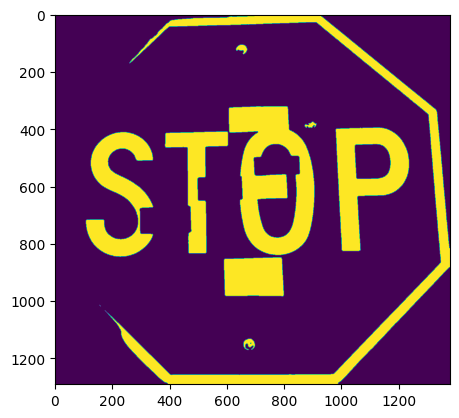

In [16]:
#path = "Train_4/P5.jpg"
path = "Train_5/Test/BW Rectangles - GTSRB/pseudogerman-largebandwrectangles-basement_05ft_0deg.jpg"


img = cv2.imread(path)    
img = remove_bg(img)
#img = cv2.cvtColor(np.array(img), cv2.COLOR_BGRA2BGR)
#img = cv2.bilateralFilter(img, 5, 175, 175)
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

mask = getcolormask('blue' , img)



reader = easyocr.Reader(['en'])
img= remove_noise_T(img)
plt.imshow(img)

result = reader.readtext(img, detail=1, paragraph=False)
#result = recognize_text(img)
#word = Word(result)
#corrected = word.correct()
#word = nearly_match(result[0])
print(result)
#plt.imshow(img)


In [ ]:
path = "Train/Train_Neg_8.png"
img = cv2.imread(path)
img = remove_bg(img)



contour_list = []
mask = getcolormask('green' , image)
if cv2.countNonZero(mask) > min_area:
    contours, hierarchy = cv2.findContours(mask, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
    smoothened = get_smoothened(contours)
    cv2.drawContours(img, contours, -1, (255,0,255), thickness=12)
    for cnt in contours: 
        if cv2.contourArea(cnt, True)>0:    #Consider only clockwise contours
            contour_list.append(cnt)



#cv2.drawContours(img, contour_list, -1, (255,0,255), thickness=12)


#print(get_color(img))
#shape = get_shape(img)
#print(shape)
#img= remove_noise_T(img)
#contours, hierarchy = cv2.findContours(img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
#smoothened = get_smoothened(contours)
#mask = getcolormask('green' , img)
#contours, hierarchy = cv2.findContours(mask, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
print(len(contours))
print(len(contour_list))
                                       
                                       #cv2.drawContours(img, smoothened,  -1, (255,0,0), 5)
#image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


plt.imshow(img)

#contours = get_contours(img)
#cnt_max = max(contours, key = cv2.contourArea)
#contours.remove(cnt_max)
#stencil  = np.zeros(image.shape[:-1]).astype(np.uint8)
#stencil[:] = 160


#smoothened = get_smoothened(contours)


# Overlay the smoothed contours on the original image
#cv2.drawContours(img, smoothened, -1, (255,0,255), thickness=cv2.FILLED)

#cv2.imwrite('remove_noise_T.png',img) 
#text = pytesseract.image_to_string(img, config='--psm 13')
#text = reader.readtext(image, detail=1, paragraph=False)
#print(text)


In [ ]:
path = "Train_4/tp5.png"
img = cv2.imread(path)
img = remove_bg(img)
#mask = getcolormask('red' , image)

    #image= remove_noise_T(image)

#plt.imshow(img)
#colors_present = get_color(img)
#print(colors_present)
#mask = getcolormask('red' , img)

result = recognize_text(img)
#result = recognize_text(img)
#reader = easyocr.Reader(['en'])

#result1 =reader.readtext(img, detail=1, paragraph=False)
for item in result:
    corrected = spell.correction(item)
print(corrected)
plt.imshow(img)
print(spell.correction('STOPL'))

            
#has_word(result, path)
#string = 'STOP'
#string = list(string)
#string = string.split(None, 3)
#print(string)

In [ ]:


#path = "attac-stop.png"
path = "threshold10.png"


img = cv2.imread(path)
img = remove(img)
img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

contours = get_contours(img)
#cnt_max = max(contours, key = cv2.contourArea)
#contours.remove(cnt_max)

stencil  = np.zeros(image.shape[:-1]).astype(np.uint8)
stencil[:] = 160


smoothened = get_smoothened(contours)


# Overlay the smoothed contours on the original image
cv2.drawContours(stencil, smoothened, -1, (255,255,255), thickness=cv2.FILLED)
cv2.imwrite('Smooth10.png',stencil) 

plt.imshow(stencil)

In [ ]:
#path = "uw17-square.jpg"
#path = "stop-sign.jpg"
path = "threshold10.png"
img = cv2.imread(path)
#max_area = get_max_area(img)
#img = remove(img)
reader = easyocr.Reader(['en'])
result = reader.readtext(image, detail=1, paragraph=False)
#(bbox, text, prob) 
print(result)

In [ ]:


#img = cv2.imread('p-300x168.png')

img = cv2.imread('Smooth10.png')
image = cv2.cvtColor(np.array(img), cv2.COLOR_BGRA2BGR)

#image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
text = pytesseract.image_to_string(img, config='--psm 13')
#d = pytesseract.image_to_string(image, output_type=Output.DICT)
print(text)


In [ ]:
#path = "attac-stop.png"
path = "uw17-square.jpg"
alpha = .006
#path = "stop-sign.jpg"
img = cv2.imread(path)
#max_area = get_max_area(img)
#write_name(path)
img = remove(img)
img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
stencil  = np.zeros(image.shape[:-1]).astype(np.uint8)
stencil[:] = 160

contours = get_contours(img)
cnt_max = max(contours, key = cv2.contourArea)
contours.remove(cnt_max)


for cnt in contours:
    approx = cv2.approxPolyDP(cnt, alpha*cv2.arcLength(cnt, True), True)
    #cv2.drawContours(image, approx, -1, (255, 255, 0), thickness=cv2.FILLED)
    #cv2.fillPoly(img, approx, (255,0,255))
    cv2.drawContours(stencil, [approx], 0, (0, 255, 255), -1)


#cv2.drawContours(img, contours,  -1, (255,0,0), thickness=cv2.FILLED)  
cv2.imwrite('cont.jpg',stencil) 

#dst = cv2.fastNlMeansDenoisingColored(img, None,10,10,7,21)



#colors_present, shape_list, cnt_max = get_shape(image)
#lines = cv2.HoughLinesP(remove_noise(image,rho = 1,theta = 1*np.pi/180,threshold = 100,minLineLength = 100,maxLineGap = 5)
                                                
#for line in lines:
#    x1, y1, x2, y2 = line[0]
#    cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 3)

#image = remove_noise(image)
#lower_bound = np.array([107,50,60])
#upper_bound = np.array([110,255,255])

#mask = cv2.inRange(get_hsv(image), lower_bound, upper_bound)      
#mask = getcolormask("red", image)
#contours, hierarchy = cv2.findContours(mask, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
#contours = get_contours(image)
#min_area = 5000
#contours_list = []
#for cnt in contours:
#    area = cv2.contourArea(cnt)
#    print(area)
#    if area > min_area and area<image.size/3.2:
#        contours_list.append(cnt)

#fill_color = [255,255,255] # any BGR color value to fill with
#mask_value = 255            # 1 channel white (can be any non-zero uint8 value)
#stencil  = np.zeros(image.shape[:-1]).astype(np.uint8)
#stencil[:] = 160

#cv2.fillPoly(stencil, contours_list, fill_color)


#fin = cv2.bitwise_and(stencil, stencil, mask = maskred)
#cv2.fillPoly(stencil, contours_list, mask_value)
#sel      = stencil != mask_value # select everything that is not mask_value
#image[sel] = fill_color            # and fill it with fill_color

#mask = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel) 
#cnts, hier = cv2.findContours(image, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

#mx = max(cnts, key = cv2.contourArea)
##cv2.drawContours(image, contours_list,  -1, (255,0,255), thickness=cv2.FILLED)

#cv2.imwrite('cont.jpg',image) 
#print(len(cnts))
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(stencil)

In [ ]:

reader = easyocr.Reader(['en'])
result = reader.readtext(maskred, detail=1, paragraph=False)
#(bbox, text, prob) 
print(result)


In [ ]:

colors_present = get_color(img)
has_color(colors_present, path)        
print(colors_present) 

result = recognize_text(stencil)
has_word(result, path)
print(result)

#colors_present, shape, cnt_max = get_shape(img)
shape = get_shape(img)

has_shape(shape, path)
print(shape)

external_shape = get_external_shape(img)
has_external_shape(external_shape, path)
print(external_shape)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)



In [ ]:
#img = cv2.imread("ori_stop_sign.png")
#img = cv2.imread("limit.jpg")
#img = cv2.imread("uw17-square-usstop-l1rectangles-less-256-epoch-999-area-downsizefirst.png")
#img = cv2.imread("uw17-square.jpg")
#img = cv2.imread("35.png")
#img = cv2.imread("adv_group 2.png")
#img = cv2.imread("Screenshotadv.png")
#img = cv2.imread('stop.jpg')
#img = cv2.imread('stop-sign.jpg')
#img = cv2.imread("image3.jpg")
img = cv2.imread("stop1.png")
img = remove(img)
image = img.copy()
blurImg = cv2.blur(img,(10,10)) 


#hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
hsv = get_hsv(img)
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


# lower bound and upper bound for red color
lower_red = np.array([160,50,50])
upper_red = np.array([180,255,255])


     
# Threshold the HSV image using inRange function to get only red colors
mask = cv2.inRange(hsv, lower_red, upper_red)
# Segment only the detected region
segmented_img = cv2.bitwise_and(img, img, mask=mask)
# removeing unnecessary noise.
#define kernel size  
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
dilation = cv2.dilate(img,kernel,iterations = 1)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

# Remove unnecessary noise from mask
# mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)  #  cv2.MORPH_CLOSE removes unnecessary black noises from the white region.
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel) # cv2.MORPH_OPEN removes white noise from the black region of the mask.



plt.figure(figsize=[18,18])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#plt.subplot(241);plt.imshow(image[:,:,::-1]);plt.title("Original Image",fontdict={'fontsize': 15});plt.axis('off');
plt.subplot(241);plt.imshow(image);plt.title("Original Image",fontdict={'fontsize': 15});plt.axis('off');

plt.subplot(242);plt.imshow(mask, cmap='gray');plt.title("Mask of red Color",fontdict={'fontsize': 15});plt.axis('off');
plt.subplot(243);plt.imshow(segmented_img[:,:,::-1]);plt.title("segmented_img",fontdict={'fontsize': 15});plt.axis('off');
plt.subplot(244);plt.imshow(erosion);plt.title("erosion",fontdict={'fontsize': 15});plt.axis('off');
plt.subplot(245);plt.imshow(dilation);plt.title("dilation",fontdict={'fontsize': 15});plt.axis('off');
plt.subplot(246);plt.imshow(opening);plt.title("opening",fontdict={'fontsize': 15});plt.axis('off');
plt.subplot(247);plt.imshow(closing);plt.title("closing",fontdict={'fontsize': 15});plt.axis('off');
plt.subplot(248);plt.imshow(gradient);plt.title("gradient",fontdict={'fontsize': 15});plt.axis('off');

#plt.figure(figsize=[13,13])

#plt.subplot(121);plt.imshow(img[:,:,::-1]);plt.title("Original Image",fontdict={'fontsize': 25});plt.axis('off');
#plt.subplot(122);plt.imshow(mask, cmap='gray');plt.title("Mask of red Color",fontdict={'fontsize': 25});plt.axis('off');




In [ ]:
import scipy
from scipy import ndimage
import matplotlib.pyplot as plt
import scipy.misc


f = cv2.imread("adv_group 2.png")
f = remove_bg(f)
blurred_f = ndimage.gaussian_filter(f, 3)

filter_blurred_f = ndimage.gaussian_filter(blurred_f, 1)

alpha = 30
sharpened = blurred_f + alpha * (blurred_f - filter_blurred_f)

gray= cv2.cvtColor(sharpened,cv2.COLOR_BGR2GRAY)


        
#mask = getcolormask("red", image)    
mask = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel) 
cnts, hier = cv2.findContours(gray, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

#mx = max(cnts, key = cv2.contourArea)
cv2.drawContours(gray, cnts,  -1, (0,255,255), 2)  
print(len(cnts))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(gray , cmap='gray')

plt.imshow(gray)



In [ ]:
#img = cv2.imread('uw17-square.jpg')
#img = cv2.imread("limit.jpg")
img = cv2.imread("adv_group 2.png")

#print (img.astype(np.float) )
from skimage import img_as_ubyte
img = img_as_ubyte(img)
img = remove_bg(img)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

img = remove_noise(gradient)

cnts, hier = cv2.findContours(img , cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img, cnts,  -1, (255,0,0), 1)
#reader = easyocr.Reader(['en'], gpu=False)  #Hindi, telugu, and English
#results = reader.readtext(img, detail=1, paragraph=False) #Set detail to 0 for simple text output


#for (bbox, text, prob) in results:  
#    #Define bounding boxes
#    (tl, tr, br, bl) = bbox
#    tl = (int(tl[0]), int(tl[1]))
#    tr = (int(tr[0]), int(tr[1]))
#    br = (int(br[0]), int(br[1]))
#    bl = (int(bl[0]), int(bl[1]))
    
    #Remove non-ASCII characters to display clean text on the image (using opencv)
#    text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
   
    #Put rectangles and text on the image
#    cv2.rectangle(img, tl, br, (0, 255, 0), 10)
 #   cv2.putText(img, text, (tl[0], tl[1] - 10), 
 #               cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
# show the output image
plt.imshow(img )
#print(results)






In [ ]:
reader = easyocr.Reader(['en'], gpu=False)  #Hindi, telugu, and English
img = cv2.imread('uw17-square.jpg')
img = img.copy()
#img = cv2.imread('attac-stop.png')
#img = cv2.imread('uw17-square-usstop-l1rectangles-less-256-epoch-999-area-downsizefirst.png')


img =getcolormask("red", img )


results = reader.readtext(img, detail=1, paragraph=False) #Set detail to 0 for simple text output
#Paragraph=True will combine all results making it easy to capture it in a dataframe. 


#To display the text on the original image or show bounding boxes
#we need the coordinates for the text. So make sure the detail=1 above, readtext.
# display the OCR'd text and associated probability
for (bbox, text, prob) in results:  
    #Define bounding boxes
    (tl, tr, br, bl) = bbox
    tl = (int(tl[0]), int(tl[1]))
    tr = (int(tr[0]), int(tr[1]))
    br = (int(br[0]), int(br[1]))
    bl = (int(bl[0]), int(bl[1]))
    
    #Remove non-ASCII characters to display clean text on the image (using opencv)
    text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
   
    #Put rectangles and text on the image
    cv2.rectangle(img, tl, br, (0, 255, 0), 10)
    cv2.putText(img, text, (tl[0], tl[1] - 10), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
# show the output image
plt.imshow(img)
print(results)

In [ ]:
img = cv2.imread("speed_limit.jpg")
contour_list = []
mask = getcolormask('red' , img)
if cv2.countNonZero(mask) > min_area:
    contours, hierarchy = cv2.findContours(mask, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
    for cnt in contours:       
        if cv2.contourArea(cnt, True)<0:
            contour_list.append(cnt)
#    cnt_max = max(contour_list, key = cv2.contourArea)
#    contour_list.remove(cnt_max)
cv2.drawContours(img, contour_list,  -1, (0,255,0), 3)
plt.imshow(img)





In [ ]:
#img = cv2.imread("limit.jpg")
#img = cv2.imread('uw17-square.jpg')
img = cv2.imread("22333.png")

#img = remove(img)
#cnts, hierarchy = cv2.findContours(remove_noise(img), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
cnts, hierarchy = get_contours(img)
#print([hierarchy])
#print(hierarchy[0][2][2])
cv2.drawContours(img, cnts,  -1, (255,0,0), 3)
plt.imshow(img)

In [ ]:

img = cv2.imread("limit.jpg")
#img = cv2.imread("ori_stop_sign.png")
#img = cv2.imread("adv_group 2.png")
#img = cv2.imread("41.png")


img = cv2.imread("attac-stop.png")
#img = cv2.imread("stop.jpg")
#img = cv2.imread("image3.jpg")
                 
                 
img = remove(img)

print(img.shape)
plt.imshow(img)

In [ ]:
#img = cv2.imread("limit.jpg")
#img = cv2.imread("stop-sign.jpg")
img = cv2.imread("uw17-square.jpg")
#img = cv2.imread("ori_stop_sign.png")
#img = cv2.imread("attac-stop.png")
#img = cv2.imread("stop.jpg")


colors_present = get_color(img)

plt.imshow(img[:,:,::-1])
has_color(colors_present)        
print(colors_present)          


In [ ]:
colors_present, shape = get_shape(img)
print(shape)

In [ ]:
#img = gradient
#img = cv2.imread("stop-sign.jpg")
#img = cv2.imread("limit.jpg")

result = recognize_text(img)
has_word(result)
result

In [ ]:
#img = cv2.imread("adv_group 2.png")
#img = cv2.imread("output.png")
result = recognize_text(img)
has_word(result)
print(result)
plt.imshow(img[:,:,::-1])


In [ ]:
#img = cv2.imread("limit.jpg")
#img = cv2.imread("adv_group 2.png")
#img = cv2.imread("ori_stop_sign.png")
#img = cv2.imread("attac-stop.png")
#img = cv2.imread("stop.jpg")

colors_present = get_color(img)

plt.imshow(img[:,:,::-1])
has_color(colors_present)        
print(colors_present)

In [ ]:
# A text file is created and flushed
with open("recognized.txt", "w+") as file:
    for item in texts:
        # write each item on a new line
        file.write("\n has_word({})".format(item.split(None , -1)))
    print('Done')

file.close()
     
# Close the file
file.close

In [ ]:
img = cv2.imread("limit.jpg")
#img = cv2.imread("ori_stop_sign.png")
#img = cv2.imread("attac-stop.png")
#img = cv2.imread("stop.jpg")


colors_present =[]
colors_list = ['red', 'blue', 'black', 'white', 'yellow']

for color in colors_list:
    mask = getcolormask(color , get_hsv(img))
    contours,hierarchy = get_contours(mask)

    if cv2.countNonZero(mask) > img.size/1000 and (hierarchy[i][2] >-1 or hierarchy[i][3] >-1):  # a contour should have at least a child or a parent
        colors_present.append(color)

plt.imshow(img[:,:,::-1])
has_color(colors_present)        
print(colors_present)   

In [ ]:
if cv2.countNonZero(mask) > 0:
    writ("has_colour({})"".format(red))
    print('Red is present!')
    else:
        print('Red is not present!')

In [ ]:
import cv2
import numpy as np


# load image as grayscale
img = cv2.imread('attac-stop.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# threshold input image using otsu thresholding as mask and refine with morphology
ret, mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU) 
kernel = np.ones((9,9), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

# put mask into alpha channel of result
result = img.copy()
result = cv2.cvtColor(result, cv2.COLOR_BGR2BGRA)
result[:, :, 3] = mask

# save resulting masked image
cv2.imwrite('retina_masked.png', result)
plt.imshow(result)


In [ ]:
#img = cv2.imread('limit.jpg')

circles = cv2.HoughCircles(remove_noise(img), 
                   cv2.HOUGH_GRADIENT, 1, 100)
print(circles)
print(np.around(circles))
circles = np.uint16(np.around(circles))
# Draw the circles
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(img,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(img,(i[0],i[1]),2,(0,0,255),3)
plt.imshow(img)

#if circles is not None:
#print(len(detected_circles))  
print(img.size/3000)

In [ ]:
def getContours(img):
    contours,hierarchy = cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    for cnt in contours:
        area = cv2.contourArea(cnt)
        print(area)
        if area>500:
            cv2.drawContours(imgContour, cnt, -1, (255, 0, 0), 3)
            peri = cv2.arcLength(cnt,True)
            #print(peri)
            approx = cv2.approxPolyDP(cnt,alpha*peri,True)
            print(len(approx))
            objCor = len(approx)
            x, y, w, h = cv2.boundingRect(approx)
 
            if objCor ==3: objectType ="Tri"
            elif objCor == 4:
                aspRatio = w/float(h)
                if aspRatio >0.98 and aspRatio <1.03: objectType= "Square"
                else:objectType="Rectangle"
            elif objCor>4: objectType= "Circles"
            else:objectType="None"
 
 
 
            cv2.rectangle(imgContour,(x,y),(x+w,y+h),(0,255,0),2)
            cv2.putText(imgContour,objectType,
                        (x+(w//2)-10,y+(h//2)-10),cv2.FONT_HERSHEY_COMPLEX,0.7,
                        (0,0,0),2)

In [ ]:
img = cv2.imread("limit.jpg")
blur = cv2.GaussianBlur(img, (5,5), 0)


#we convert the image to an hsv image because hsv helps to differentiate intensity from color. 
# hue, which is the color or shade of the pixel. 
# The saturation is the intensity of the color. 
# A saturation of 0 is white, and a saturation of 255 is maximum intensity. 


hsv = cv2.cvtColor(blur,cv2.COLOR_BGR2HSV)


bilateral_filtered_image = cv2.bilateralFilter(img, 5, 175, 175, borderType=cv2.BORDER_CONSTANT)

edge_detected_image = cv2.Canny(bilateral_filtered_image, 70, 200)
cv2.imshow('Edge', edge_detected_image)


# lower bound and upper bound for Yellow color
lower_bound_Y = np.array([20, 80, 80])   
upper_bound_Y = np.array([30, 255, 255])
mask_Y = cv2.inRange(hsv, lower_bound_Y, upper_bound_Y)
contours_Y, hierarchy_Y = cv2.findContours(mask_Y.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
output = cv2.drawContours(mask_Y, contours_Y, -1, (0, 255, 0), 3)

# lower bound and upper bound for Green color
lower_bound_G = np.array([50, 20, 20])   
upper_bound_G = np.array([100, 255, 255])
mask_G = cv2.inRange(hsv, lower_bound_G, upper_bound_G)

# lower bound and upper bound for red color
lower_bound_R = np.array([160,50,50])
upper_bound_R = np.array([180,255,255])
#lower_bound_R = np.array([100,100,50])
#upper_bound_R = np.array([255,153,153])
mask_R = cv2.inRange(hsv, lower_bound_R, upper_bound_R)
contours_R, hierarchy_R = cv2.findContours(mask_R.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
#output_R = cv2.drawContours(img, contours_R, -1, (0, 255, 0), 5)
#print(len(contours_R))



# lower bound and upper bound for white color

lower_bound_W = np.array([0,0,168])
upper_bound_W = np.array([172,111,255])
mask_W = cv2.inRange(hsv, lower_bound_W, upper_bound_W)
contours_W, hierarchy_W = cv2.findContours(mask_W.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
contour_list_W = []
areas_W = []
for i, cnt in enumerate(contours_W):
    area = cv2.contourArea(cnt)
    if (area > img.size/2000) and (area < img.size/3.1 ) :
        contour_list_W.append(cnt)
        areas_W.append(area)
#output_W = cv2.drawContours(img, contour_list_W, -1, (0, 255, 255), 5)
#print(len(contour_list_W))
#print(areas_W )

# lower bound and upper bound for black color
lower_bound_B = np.array([0, 0, 0])
upper_bound_B = np.array([[180, 255, 40]])
#upper_bound_B = np.array([179,100,130])
mask_B = cv2.inRange(hsv, lower_bound_B, upper_bound_B)
contours_B, hierarchy_B = cv2.findContours(mask_B.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
contour_list_B = []
areas_B = []
for i, cnt in enumerate(contours_B):
    area = cv2.contourArea(cnt)
    if (area > img.size/2000) and (area < img.size/3.1 ) :
        contour_list_B.append(cnt)
        areas_B.append(area)
output_B = cv2.drawContours(img, contour_list_B, -1, (0, 255, 255), 5)
print(len(contour_list_B))

# lower bound and upper bound for blue color
lower_bound_Blue = np.array([110,50,50])
upper_bound_Blue = np.array([130,255,255])
mask_Blue = cv2.inRange(hsv, lower_bound_Blue, upper_bound_Blue)


plt.figure(figsize=[30,30])

plt.subplot(4,2,1);plt.imshow(img[:,:,::-1]);plt.title("Original Image",fontdict={'fontsize': 15});plt.axis('off');
plt.subplot(4,2,2);plt.imshow(mask_Y, cmap='gray');plt.title("Mask of yellow Color",fontdict={'fontsize': 17});plt.axis('off');
plt.subplot(4,2,3);plt.imshow(mask_G, cmap='gray');plt.title("Mask of green Color",fontdict={'fontsize': 17});plt.axis('off');
plt.subplot(4,2,4);plt.imshow(mask_R, cmap='gray');plt.title("Mask of red Color",fontdict={'fontsize': 17});plt.axis('off');
plt.subplot(4,2,5);plt.imshow(mask_W, cmap='gray');plt.title("Mask of white Color",fontdict={'fontsize': 17});plt.axis('off');
plt.subplot(4,2,6);plt.imshow(mask_B, cmap='gray');plt.title("Mask of black Color",fontdict={'fontsize': 17});plt.axis('off');
plt.subplot(4,2,7);plt.imshow(mask_Blue, cmap='gray');plt.title("Mask of blue Color",fontdict={'fontsize': 17});plt.axis('off');



In [ ]:
import cv2
import numpy as np

#img = cv2.imread('attac-stop.png')
#img = cv2.imread('stop-sign.jpg')
#img = cv2.imread("ori_stop_sign.png")
#img = cv2.imread("image3.jpg")
img = cv2.imread("limit.jpg")
#img = cv2.imread("uw17-square-usstop-l1rectangles-less-256-epoch-999-area-downsizefirst.png")
#img = cv2.imread("uw17-square.jpg")
#img = cv2.imread("35.png")
#img = cv2.imread("adv_group 2.png")
#img = cv2.imread('stop.jpg'

bilateral_filtered_image = cv2.bilateralFilter(img, 5, 175, 175, borderType=cv2.BORDER_CONSTANT)

edge_detected_image = cv2.Canny(bilateral_filtered_image, 70, 200)
cv2.imshow('Edge', edge_detected_image)


#img = cv2.imread('adv_group 2.png')

#original = img.copy()

#hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

#lower_red = np.array([160,50,50])
#upper_red = np.array([180,255,255])
     
# Threshold the HSV image using inRange function to get only red colors
#mask = cv2.inRange(hsv, lower_red, upper_red)
#segmented_img = cv2.bitwise_and(img, img, mask=mask)
gray = cv2.cvtColor(bilateral_filtered_image, cv2.COLOR_BGR2GRAY)
#edges= cv2.Canny(gray, 50,200)


#ret, thresh = cv2.threshold(gray, 127, 255, 0)
#th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
#thresh = cv2.adaptiveThreshold(gray, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 21, 4)

#cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts, hierarchy = cv2.findContours( edge_detected_image, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
hierarchy = hierarchy[0]

contour_list = []
areas = []
for i, cnt in enumerate(cnts):
      
    epsilon = 0.05*cv2.arcLength(cnt,True)
#    approx = cv2.approxPolyDP(cnt,epsilon,True)
    area = cv2.contourArea(cnt)
    if (area > 100) and (area < img.size/3.1 ) :
        contour_list.append(cnt)
        areas.append(area)
# compute the area of the contour along with the bounding box
# to compute the aspect ratio
        (x, y, w, h) = cv2.boundingRect(c)
        aspectRatio = w / float(h)
        extent = area / float(w * h)
        
        
# compute the convex hull of the contour, then use the area of the
# original contour and the area of the convex hull to compute the solidity
#    hull = cv2.convexHull(cnt)
#    hullArea = cv2.contourArea(hull)
#ß    solidity = area / float(hullArea)
#    if hierarchy[i][2] < 0 and hierarchy[i][3] < 0:
#        cv2.drawContours(img, cnts, i, (0, 0, 255), 5)
#    else:
#        cv2.drawContours(img, cnts, i, (0, 255, 0), 5)  

outer_contour = np.argmax(areas)     
print(areas) 
print(outer_contour)
print(img.size/3.05)
        
#print(cnts)
#cv2. RETR_TREE, cv2.RETR_EXTERNAL cv2.CHAIN_APPROX_NONE cv2.CHAIN_APPROX_SIMPLE
#cv2.contourArea
#cv2.minEnclosingCircle(cnt)


#cv2.drawContours(img, contour_list, outer_contour, (0,255,0), 3)
cv2.drawContours(img, contour_list, -1, (0,255,0), 3)

number_of_objects_in_image= len(contour_list)
print ("The number of objects in this image: ", str(number_of_objects_in_image))

plt.figure(figsize=[12,12])
plt.subplot(121);plt.imshow(img[:,:,::-1]);plt.title("Original Image",fontdict={'fontsize': 15});plt.axis('off');
#plt.subplot(122);plt.imshow(bilateral_filtered_image[:,:,::-1]);plt.title("Threshold Image",fontdict={'fontsize': 15});plt.axis('off');
plt.subplot(122);plt.imshow(edge_detected_image)




In [ ]:
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for cnt in cnts:
    approx = cv2.approxPolyDP(cnt,alpha*cv2.arcLength(cnt,True),True)
    print(approx)
    print(len(approx))
    if len(approx)==5:
        print("Blue = pentagon")
        cv2.drawContours(img,[cnt],0,255,-1)
    elif len(approx)==3:
        print("Green = triangle")
        cv2.drawContours(img,[cnt],0,(0,255,0),-1)
    elif len(approx)==4:
        print("Red = square")
        cv2.drawContours(img,[cnt],0,(0,0,255),-1)
    elif len(approx) == 6:
        print("Cyan = Hexa")
        cv2.drawContours(img,[cnt],0,(255,255,0),-1)
    elif len(approx) == 8:
        print("White = Octa")
        cv2.drawContours(img,[cnt],0,(255,255,255),-1)
    elif len(approx) > 12:
        print("Yellow = circle")
        cv2.drawContours(img,[cnt],0,(0,255,255),-1)


In [ ]:
# imported image and processing (shorthand here)
image = cv2.imread(args["image"])
blur = cv2.GaussianBlur(image, (5,5), 0)
blur_hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)

# set regions of color 
boundaries = [
    # black 
    ([0,0,0],[180, 255, 40])

    #pink
    #([151, 80, 50], [174, 255, 255])   
]

# loop over the boundaries
for (lower, upper) in boundaries:
    # create NumPy arrays from the boundaries
    lower = np.array(lower, dtype = "uint8")
    upper = np.array(upper, dtype = "uint8")

    # find the colors within the specified boundaries and apply
    mask = cv2.inRange(blur_hsv, lower, upper)  
    output = cv2.bitwise_and(image, image, mask = mask)

    # show the images
    cv2.imshow("images", np.hstack([image, output]))

Text 

In [ ]:
#!pip3 install colorthief
!pip3 install webcolors



In [ ]:
import webcolors
from scipy.spatial import KDTree
from webcolors import (CSS3_HEX_TO_NAMES,hex_to_rgb,)
def convert_rgb_to_names(rgb_tuple):
    
    # a dictionary of all the hex and their respective names in css3
    css3_db = CSS3_HEX_TO_NAMES
    names = []
    rgb_values = []
    for color_hex, color_name in css3_db.items():
        names.append(color_name)
        rgb_values.append(hex_to_rgb(color_hex))
    
    kdt_db = KDTree(rgb_values)
    distance, index = kdt_db.query(rgb_tuple)
    return f'closest match: {names[index]}'




img = "limit.jpg"
from colorthief import ColorThief
color_thief = ColorThief(img)
dominant_color = color_thief.get_color(quality=1)
palette = color_thief.get_palette(color_count=2)
plt.imshow([[palette[i] for i in range(3)]])
plt.show()
print([palette])
print(dominant_color)
#webcolors.rgb_to_name((5, 5, 5))
convert_rgb_to_names(dominant_color)


#im.getcolors()

In [ ]:
#AVERANGE COLOR, MIN, MAX, STANDARD DEVIATION
#SELECT ONLY NOT TRANSPARENT COLOR


from PIL import Image
import sys
import os
import os.path
from os import path
import numpy as np
import math 



def compute_average_image_color(img_path):

    if not os.path.isfile(img_path):
        print(path_inp_image, 'DONT EXISTS, EXIT')
        sys.exit()

    
    #load image
    img = Image.open(img_path).convert('RGBA')
    img = img.resize((50,50))  # Small optimization


    #DEFINE SOME VARIABLES
    width, height = img.size
    r_total = 0
    g_total = 0
    b_total = 0
    count = 0
    red_list=[]
    green_list=[]
    blue_list=[]
    
    
    #READ AND CHECK PIXEL BY PIXEL
    for x in range(0, width):
        for y in range(0, height):
            r, g, b, alpha = img.getpixel((x,y))
            
            if alpha !=0:
                red_list.append(r)
                green_list.append(g)
                blue_list.append(b)
            
                r_total += r
                g_total += g
                b_total += b
                count += 1

            
    #CALCULATE THE AVRANGE COLOR, MIN, MAX, ETC             
    average_color=(round(r_total/count), round(g_total/count), round(b_total/count))
    print(average_color)
    
    red_list.sort()
    green_list.sort()
    blue_list.sort()

    
    red_min_max=[]
    green_min_max=[]
    blue_min_max=[]


    
    
    red_min_max.append(min(red_list))
    red_min_max.append(max(red_list))
    green_min_max.append(min(green_list))
    green_min_max.append(max(red_list))
    blue_min_max.append(min(blue_list))
    blue_min_max.append(max(blue_list))
    
    print('red_min_max: ', red_min_max)
    print('green_min_max: ', green_min_max)
    print('blue_min_max: ', blue_min_max)



    #variance and standard devietion
    red_stddev=round(math.sqrt(np.var(red_list)))
    green_stddev=round(math.sqrt(np.var(green_list)))
    blue_stddev=round(math.sqrt(np.var(blue_list)))

    print('red_stddev: ', red_stddev)
    print('green_stddev: ', green_stddev)
    print('blue_stddev: ', blue_stddev)






img_path='adv_group 2.png'
compute_average_image_color(img_path)




In [ ]:
    # DataFlair background removal
# import necessary packages
import os
import cv2
import numpy as np
import mediapipe as mp
# store background images in a list

# initialize mediapipe
mp_selfie_segmentation = mp.solutions.selfie_segmentation
selfie_segmentation = mp_selfie_segmentation.SelfieSegmentation(model_selection=1)

frame = cv2.imread('ori_stop_sign.png')
height , width, channel = frame.shape

RGB = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
  # get the result
results = selfie_segmentation.process(RGB)
  # extract segmented mask
mask = results.segmentation_mask
  # show outputs
plt.imshow( mask)
#plt.imshow( frame)


In [ ]:
import cv2
import numpy as np

img = cv2.imread('ori_stop_sign.png')

# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

In [ ]:
plt.figure()

plt.subplot(141);plt.imshow(img)
#plt.subplot(142);plt.imshow(thresholding)
plt.subplot(143);plt.imshow(opening)
plt.subplot(144);plt.imshow(canny)


In [ ]:
print(d['text'])

In [ ]:
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow( img)


*Colour* detection **bold text**

In [ ]:
img = cv2.imread("ori_stop_sign.png")

# convert to hsv colorspace
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# lower bound and upper bound for Green color
lower_bound = np.array([50, 20, 20])   
upper_bound = np.array([100, 255, 255])
# find the colors within the boundaries
mask = cv2.inRange(hsv, lower_bound, upper_bound)

#define kernel size  
kernel = np.ones((30,30),np.uint8)
# Remove unnecessary noise from mask
# mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)


plt.figure(figsize=[13,13])

plt.subplot(121);plt.imshow(img[:,:,::-1]);plt.title("Original Image",fontdict={'fontsize': 25});plt.axis('off');
plt.subplot(122);plt.imshow(mask, cmap='gray');plt.title("Mask of green Color",fontdict={'fontsize': 25});plt.axis('off');


In [ ]:
#Maximally Stable Extremal Regions - MSER algorithm:
mser = cv2.MSER_create(_min_area=100,_max_area=10000)
regions_ red, _ = mser.detectRegions(red_normalize.astype('uint8'))
regions_blue, _ = mser.detectRegions(blue_normalize.astype('uint8'))

#we chose min area 100 and max area 10k for mser detection so that we don’t have too many noise and small regions. . Once MSER 
#regions are detected a binary image for both the red and green mser regions are formed as shown below.

In [ ]:
img = cv2.imread('limit.jpg')
cv2.HoughCircles(img, method, dp, minDist[, circles[, param1[, param2[, minRadius[, maxRadius]]]]]) → circles¶


# New section

In [ ]:
 import cv2
import numpy as np
  
# Read image.
img = cv2.imread('limit.jpg', cv2.IMREAD_COLOR)
  
# Convert to grayscale.
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# Blur using 3 * 3 kernel.
gray_blurred = cv2.blur(gray, (3, 3))
  
# Apply Hough transform on the blurred image.
detected_circles = cv2.HoughCircles(gray_blurred, 
                   cv2.HOUGH_GRADIENT, 1, 20, param1 = 50,
               param2 = 30, minRadius = 1, maxRadius = 40)
  
# Draw circles that are detected.
if detected_circles is not None:
  
    # Convert the circle parameters a, b and r to integers.
    detected_circles = np.uint16(np.around(detected_circles))
  
    for pt in detected_circles[0, :]:
        a, b, r = pt[0], pt[1], pt[2]
  
        # Draw the circumference of the circle.
        cv2.circle(img, (a, b), r, (0, 255, 0), 2)
  
        # Draw a small circle (of radius 1) to show the center.
        cv2.circle(img, (a, b), 1, (0, 0, 255), 3)

        cv2.imshow("Detected Circle", img)
        cv2.waitKey(0)

In [ ]:
# contour and shape detection
import cv2
import numpy as np
 
def stackImages(scale,imgArray):
    rows = len(imgArray)
    cols = len(imgArray[0])
    rowsAvailable = isinstance(imgArray[0], list)
    width = imgArray[0][0].shape[1]
    height = imgArray[0][0].shape[0]
    if rowsAvailable:
        for x in range ( 0, rows):
            for y in range(0, cols):
                if imgArray[x][y].shape[:2] == imgArray[0][0].shape [:2]:
                    imgArray[x][y] = cv2.resize(imgArray[x][y], (0, 0), None, scale, scale)
                else:
                    imgArray[x][y] = cv2.resize(imgArray[x][y], (imgArray[0][0].shape[1], imgArray[0][0].shape[0]), None, scale, scale)
                if len(imgArray[x][y].shape) == 2: imgArray[x][y]= cv2.cvtColor( imgArray[x][y], cv2.COLOR_GRAY2BGR)
        imageBlank = np.zeros((height, width, 3), np.uint8)
        hor = [imageBlank]*rows
        hor_con = [imageBlank]*rows
        for x in range(0, rows):
            hor[x] = np.hstack(imgArray[x])
        ver = np.vstack(hor)
    else:
        for x in range(0, rows):
            if imgArray[x].shape[:2] == imgArray[0].shape[:2]:
                imgArray[x] = cv2.resize(imgArray[x], (0, 0), None, scale, scale)
            else:
                imgArray[x] = cv2.resize(imgArray[x], (imgArray[0].shape[1], imgArray[0].shape[0]), None,scale, scale)
            if len(imgArray[x].shape) == 2: imgArray[x] = cv2.cvtColor(imgArray[x], cv2.COLOR_GRAY2BGR)
        hor= np.hstack(imgArray)
        ver = hor
    return ver
 
def getContours(img):
    contours,hierarchy = cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    for cnt in contours:
        area = cv2.contourArea(cnt)
        print(area)
        if area>1000:
            #cv2.drawContours(imgContour, cnt, -1, (255, 0, 0), 3)
            peri = cv2.arcLength(cnt,True)
            #print(peri)
            approx = cv2.approxPolyDP(cnt,alpha*peri,True)
            print(len(approx))
            objCor = len(approx)
            x, y, w, h = cv2.boundingRect(approx)
 
            if objCor ==3: objectType ="Tri"
            elif objCor == 4:
                aspRatio = w/float(h)
                if aspRatio >0.98 and aspRatio <1.03: objectType= "Square"
                else:objectType="Rectangle"
            elif objCor>4: objectType= "Circles"
            else:objectType="None"
 
 
 
            cv2.rectangle(imgContour,(x,y),(x+w,y+h),(0,255,0),2)
            cv2.putText(imgContour,objectType,
                        (x+(w//2)-10,y+(h//2)-10),cv2.FONT_HERSHEY_COMPLEX,0.7,
                        (0,0,0),2)
 
 
 
 
path = 'ori_stop_sign.png'
img = cv2.imread(path)
imgContour = img.copy()
 
imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
imgBlur = cv2.GaussianBlur(imgGray,(7,7),1)
imgCanny = cv2.Canny(imgBlur,50,50)
getContours(imgCanny)
 
imgBlank = np.zeros_like(img)
imgStack = stackImages(0.8,([img,imgGray,imgBlur],
                            [imgCanny,imgContour,imgBlank]))
 
cv2.imshow("Stack", imgStack)
 
cv2.waitKey(0)

In [ ]:
#Colour detection

import cv2
import numpy as np
 
def empty(a):
    pass
 
def stackImages(scale,imgArray):
    rows = len(imgArray)
    cols = len(imgArray[0])
    rowsAvailable = isinstance(imgArray[0], list)
    width = imgArray[0][0].shape[1]
    height = imgArray[0][0].shape[0]
    if rowsAvailable:
        for x in range ( 0, rows):
            for y in range(0, cols):
                if imgArray[x][y].shape[:2] == imgArray[0][0].shape [:2]:
                    imgArray[x][y] = cv2.resize(imgArray[x][y], (0, 0), None, scale, scale)
                else:
                    imgArray[x][y] = cv2.resize(imgArray[x][y], (imgArray[0][0].shape[1], imgArray[0][0].shape[0]), None, scale, scale)
                if len(imgArray[x][y].shape) == 2: imgArray[x][y]= cv2.cvtColor( imgArray[x][y], cv2.COLOR_GRAY2BGR)
        imageBlank = np.zeros((height, width, 3), np.uint8)
        hor = [imageBlank]*rows
        hor_con = [imageBlank]*rows
        for x in range(0, rows):
            hor[x] = np.hstack(imgArray[x])
        ver = np.vstack(hor)
    else:
        for x in range(0, rows):
            if imgArray[x].shape[:2] == imgArray[0].shape[:2]:
                imgArray[x] = cv2.resize(imgArray[x], (0, 0), None, scale, scale)
            else:
                imgArray[x] = cv2.resize(imgArray[x], (imgArray[0].shape[1], imgArray[0].shape[0]), None,scale, scale)
            if len(imgArray[x].shape) == 2: imgArray[x] = cv2.cvtColor(imgArray[x], cv2.COLOR_GRAY2BGR)
        hor= np.hstack(imgArray)
        ver = hor
    return ver
 
 
 
path = '/content/ori_stop_sign.png'
cv2.namedWindow("TrackBars")
cv2.resizeWindow("TrackBars",640,240)
cv2.createTrackbar("Hue Min","TrackBars",0,179,empty)
cv2.createTrackbar("Hue Max","TrackBars",19,179,empty)
cv2.createTrackbar("Sat Min","TrackBars",110,255,empty)
cv2.createTrackbar("Sat Max","TrackBars",240,255,empty)
cv2.createTrackbar("Val Min","TrackBars",153,255,empty)
cv2.createTrackbar("Val Max","TrackBars",255,255,empty)
 
while True:
    img = cv2.imread(path)
    imgHSV = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    h_min = cv2.getTrackbarPos("Hue Min","TrackBars")
    h_max = cv2.getTrackbarPos("Hue Max", "TrackBars")
    s_min = cv2.getTrackbarPos("Sat Min", "TrackBars")
    s_max = cv2.getTrackbarPos("Sat Max", "TrackBars")
    v_min = cv2.getTrackbarPos("Val Min", "TrackBars")
    v_max = cv2.getTrackbarPos("Val Max", "TrackBars")
    print(h_min,h_max,s_min,s_max,v_min,v_max)
    lower = np.array([h_min,s_min,v_min])
    upper = np.array([h_max,s_max,v_max])
    mask = cv2.inRange(imgHSV,lower,upper)
    imgResult = cv2.bitwise_and(img,img,mask=mask)
 
 
    # cv2.imshow("Original",img)
    # cv2.imshow("HSV",imgHSV)
    # cv2.imshow("Mask", mask)
    # cv2.imshow("Result", imgResult)
 
    imgStack = stackImages(0.6,([img,imgHSV],[mask,imgResult]))
    cv2.imshow("Stacked Images", imgStack)
 

In [ ]:
def hog(img):
    gx = cv.Sobel(img, cv.CV_32F, 1, 0)
    gy = cv.Sobel(img, cv.CV_32F, 0, 1)
    mag, ang = cv.cartToPolar(gx, gy)
    bins = np.int32(bin_n*ang/(2*np.pi))    # quantizing binvalues in (0...16)
    bin_cells = bins[:10,:10], bins[10:,:10], bins[:10,10:], bins[10:,10:]
    mag_cells = mag[:10,:10], mag[10:,:10], mag[:10,10:], mag[10:,10:]
    hists = [np.bincount(b.ravel(), m.ravel(), bin_n) for b, m in zip(bin_cells, mag_cells)]
    hist = np.hstack(hists)     # hist is a 64 bit vector
    return hist

In [ ]:
#Trackbar


path =  "attac-stop.png"
def callback(x):
	global Kernel_Size
	#assign trackbar position value to H,S,V High and low variable
	Kernel_Size = cv2.getTrackbarPos('Kernel Size','controls')


#create a seperate window named 'controls' for trackbar
cv2.namedWindow('controls',2)
cv2.resizeWindow("controls", 550,10);

#global variable
Kernel_Size = 5

#create trackbars 
cv2.createTrackbar('Kernel Size','controls',0,200,callback)


while(1):
	#read source image
	img=cv2.imread(path)
	#convert sourece image to HSC color mode
	hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
	kernel = np.ones((Kernel_Size,Kernel_Size),np.uint8)
	erosion = cv2.erode(img,kernel,iterations = 1)
	dilation = cv2.dilate(img,kernel,iterations = 1)
	opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
	closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
	gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)



	#show image
	cv2.imshow('erosion',erosion)
	cv2.imshow('gradient',gradient)
	
	#waitfor the user to press escape and break the while loop 
	k = cv2.waitKey(1) & 0xFF
	if k == 27:
		break
		
#destroys all window
cv2.destroyAllWindows()

In [ ]:
# compare contours       
        
#    contours_hsv,hierarchy_hsv = get_contours(remove_noise(img))
#    contours_mask,hierarchy_mask = get_contours(mask)
#    for i, contour_hsv  in enumerate(contours_hsv):
#        for j, contour_mask in enumerate(contours_mask):
#            if cv2.matchShapes(contour_mask,contour_hsv,1,0.0)>0.05:
#                contour_list.append(contour_hsv)
#   print(contour_hsv)        
    
    
#    for i, hierarchy  in enumerate(hierarchy_hsv):
#            if cv2.countNonZero(mask) > img.size/1000 and (hierarchy[i][2] >-1 or hierarchy[i][3] >-1): 
#            # a contour should have at least a child or a parent
#             colors_present.append(color)

In [ ]:
!pip3 --upgrade pip3
!pip3 install pixellib
import pixellib
from pixellib.tune_bg import alter_bg

#from tensorflow.python.keras.utils.data_utils import get_file
#WEIGHTS_PATH_X = "https://github.com/bonlime/keras-deeplab-v3-plus/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5"
#weights_path = get_file('deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',WEIGHTS_PATH_X, cache_subdir='models')

change_bg = alter_bg()
change_bg.load_pascalvoc_model("deeplabv3_xception_tf_dim_ordering_tf_kernels.h5")
change_bg.change_bg_img(f_image_path = "Train/Train_Neg_9.svg.png",b_image_path = "Train/Sky_landscape.jpeg", output_image_name="Train/new_img.jpeg")


In [ ]:


# find those words that may be misspelled
misspelled = spell.unknown(['something', 'is', 'hapenning', 'here'])
print
for word in misspelled:
    # Get the one `most likely` answer
    print(spell.correction(word))

    # Get a list of `likely` options
    print(spell.candidates(word))